In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import scipy.stats as stats
import pylab
# from warnings import warn

# 2018.11.26 Created by Eamon.Zhang
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
    
def log_transform(data,cols=[]):
    """
    Logarithmic transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_log'] = np.log(data_copy[i]+1)
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_log'))       
    return data_copy 


def reciprocal_transform(data,cols=[]):
    """
    Reciprocal transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_reciprocal'] = 1/(data_copy[i])
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_reciprocal'))       
    return data_copy 


def square_root_transform(data,cols=[]):
    """
    square root transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_square_root'] = (data_copy[i])**(0.5)
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_square_root'))        
    return data_copy 


def exp_transform(data,coef,cols=[]):
    """
    exp transformation
    """
    
    data_copy = data.copy(deep=True)
    for i in cols:
        data_copy[i+'_exp'] = (data_copy[i])**coef
        print('Variable ' + i +' Q-Q plot')
        diagnostic_plots(data_copy,str(i+'_exp'))         
    return data_copy 

In [3]:
from scipy.stats import kstest, norm

### Load Dataset

In [4]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

In [5]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/fasthill/My-gist/main/data/titanic/train.csv', 
    usecols=use_cols)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, data.Survived, test_size=0.3, random_state=2022)

In [8]:
X_train.shape, X_test.shape

((623, 6), (268, 6))

### Logarithmic transformation

In [9]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)

Variable Fare Q-Q plot


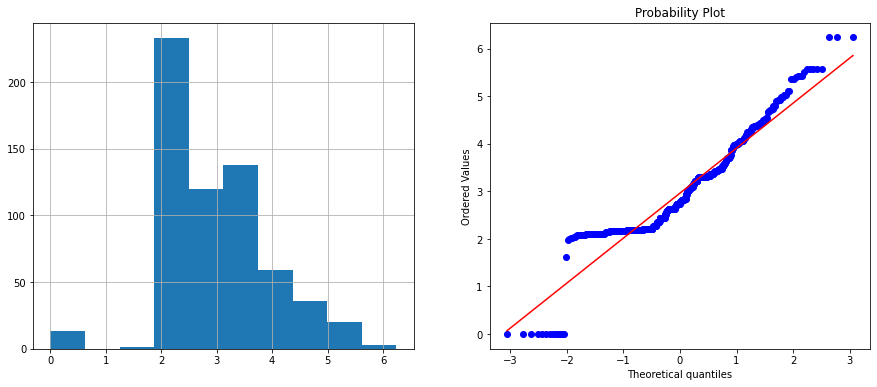

In [10]:
X_train_copy = log_transform(data=X_train, cols=['Fare'])

In [11]:
X_train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_log
615,1,2,female,24.0,1,65.000,4.189655
598,0,3,male,NaN,0,7.225,2.107178
161,1,2,female,40.0,0,15.750,2.818398
854,0,2,female,44.0,1,26.000,3.295837
216,1,3,female,27.0,0,7.925,2.188856


In [12]:
test_stat, p_val = stats.shapiro(X_train_copy['Fare_log'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.9215338826179504, p_value : 1.765155781584878e-17


In [13]:
ks_statistic, p_value = kstest(X_train_copy['Fare_log'], 'norm')
print(ks_statistic, p_value)

0.953635610946576 0.0


Variable Fare Q-Q plot


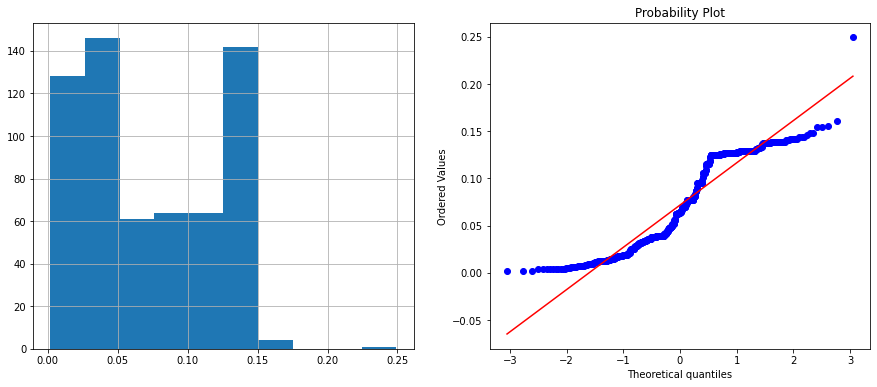

     Survived  Pclass     Sex   Age  SibSp    Fare  Fare_reciprocal
615         1       2  female  24.0      1  65.000         0.015385
598         0       3    male   NaN      0   7.225         0.138408
161         1       2  female  40.0      0  15.750         0.063492
854         0       2  female  44.0      1  26.000         0.038462
216         1       3  female  27.0      0   7.925         0.126183
328         1       3  female  31.0      1  20.525         0.048721


In [14]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)
X_train_copy = X_train_copy[X_train_copy.Fare!=0] # Warning that x should not be 0
#X_train_copy[X_train_copy.Fare==0]
X_train_copy = reciprocal_transform(data=X_train_copy,cols=['Fare'])
print(X_train_copy.head(6))

In [15]:
test_stat, p_val = stats.shapiro(X_train_copy['Fare_reciprocal'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.9027693867683411, p_value : 2.961335285767337e-19


In [16]:
ks_statistic, p_value = kstest(X_train_copy['Fare_reciprocal'], 'norm')
print('Test_statistics : {}, p_value : {}'.format(ks_statistic, p_value))

Test_statistics : 0.5007786829778329, p_value : 5.176362852112706e-142


Variable Fare Q-Q plot


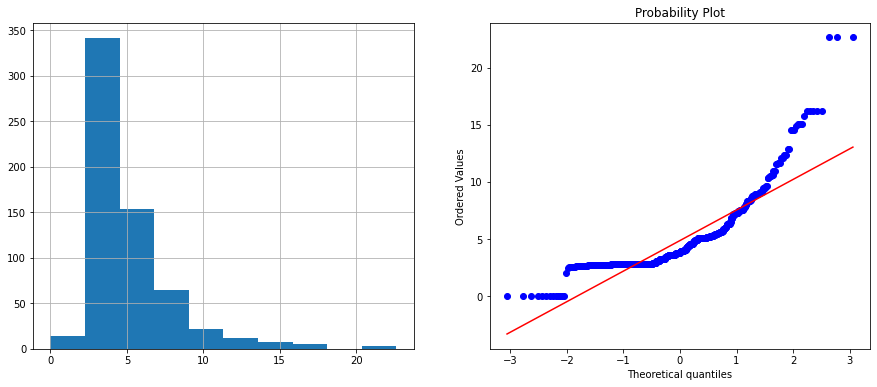

     Survived  Pclass     Sex   Age  SibSp    Fare  Fare_square_root
615         1       2  female  24.0      1  65.000          8.062258
598         0       3    male   NaN      0   7.225          2.687936
161         1       2  female  40.0      0  15.750          3.968627
854         0       2  female  44.0      1  26.000          5.099020
216         1       3  female  27.0      0   7.925          2.815138
328         1       3  female  31.0      1  20.525          4.530453


In [17]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = square_root_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

In [18]:
test_stat, p_val = stats.shapiro(X_train_copy['Fare_square_root'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.7794486284255981, p_value : 3.8702717790428137e-28


In [19]:
ks_statistic, p_value = kstest(X_train_copy['Fare_square_root'], 'norm') # Kolmogorov Smirnov Statistic,
print('Test_statistics : {}, p_value : {}'.format(ks_statistic, p_value))

Test_statistics : 0.971274444561121, p_value : 0.0


Variable Fare Q-Q plot


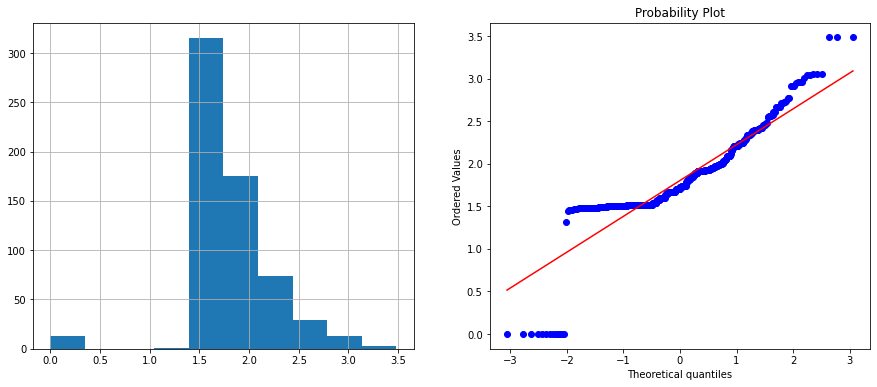

     Survived  Pclass     Sex   Age  SibSp    Fare  Fare_exp
615         1       2  female  24.0      1  65.000  2.304532
598         0       3    male   NaN      0   7.225  1.485141
161         1       2  female  40.0      0  15.750  1.735626
854         0       2  female  44.0      1  26.000  1.918645
216         1       3  female  27.0      0   7.925  1.512864
328         1       3  female  31.0      1  20.525  1.830023


In [20]:
# add the new created feature
X_train_copy = X_train.copy(deep=True)
X_train_copy = exp_transform(data=X_train,cols=['Fare'],coef=0.2)
print(X_train_copy.head(6))

In [21]:
test_stat, p_val = stats.shapiro(X_train_copy['Fare_exp'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.8479549884796143, p_value : 5.441754611844961e-24


In [22]:
ks_statistic, p_value = kstest(X_train_copy['Fare_exp'], 'norm')
print('Test_statistics : {}, p_value : {}'.format(ks_statistic, p_value))

Test_statistics : 0.9028941613130825, p_value : 0.0


In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_boxcox'] = pt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp    Fare  Fare_boxcox
615         1       2  female  24.0      1  65.000     1.236089
598         0       3    male   NaN      0   7.225    -0.870236
161         1       2  female  40.0      0  15.750    -0.115860
854         0       2  female  44.0      1  26.000     0.369751
216         1       3  female  27.0      0   7.925    -0.781668
328         1       3  female  31.0      1  20.525     0.141287


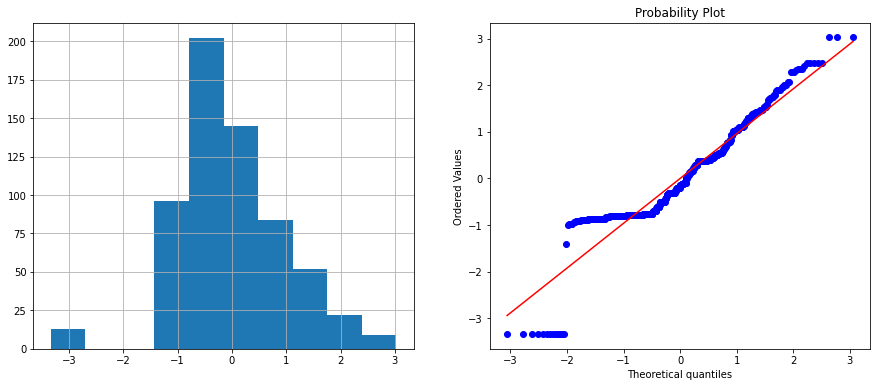

In [24]:
diagnostic_plots(X_train_copy,'Fare_boxcox')

In [25]:
test_stat, p_val = stats.shapiro(X_train_copy['Fare_boxcox'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.9187470078468323, p_value : 8.529517554093623e-18


In [26]:
ks_statistic, p_value = kstest(X_train_copy['Fare_boxcox'], 'norm')
print('Test_statistics : {}, p_value : {}'.format(ks_statistic, p_value))

Test_statistics : 0.14842643259634428, p_value : 1.9128374495014968e-12


In [27]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_qt'] = qt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp    Fare   Fare_qt
615         1       2  female  24.0      1  65.000  1.180146
598         0       3    male   NaN      0   7.225 -1.594016
161         1       2  female  40.0      0  15.750  0.040310
854         0       2  female  44.0      1  26.000  0.384019
216         1       3  female  27.0      0   7.925 -0.687193
328         1       3  female  31.0      1  20.525  0.182353


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (623). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


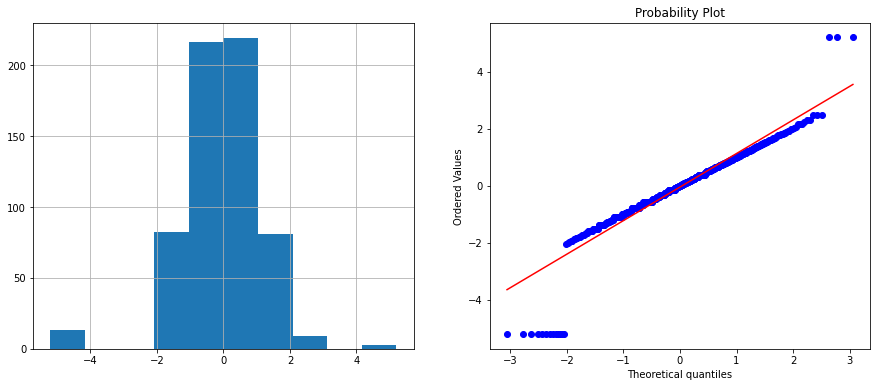

In [28]:
diagnostic_plots(X_train_copy,'Fare_qt')

In [29]:
test_stat, p_val = stats.shapiro(X_train_copy['Fare_qt'])
print('Test_statistics : {}, p_value : {}'.format(test_stat, p_val))

Test_statistics : 0.896520733833313, p_value : 4.5497715731461085e-20


In [30]:
ks_statistic, p_value = kstest(X_train_copy['Fare_qt'], 'norm')
print('Test_statistics : {}, p_value : {}'.format(ks_statistic, p_value))

Test_statistics : 0.026833132906329216, p_value : 0.7502555408953088


If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution
If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

In [35]:
from statsmodels.stats import shapiro

ImportError: cannot import name 'shapiro' from 'statsmodels.stats' (c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\__init__.py)

In [36]:
!pip install statsmodels

https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

https://www.graphpad.com/support/faq/testing-data-for-normal-distrbution/

https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/